# Questions
(for Sean)

- What's the relationship between a dataset in sklearn, pandas data frame, and numpy arrays?
My guess is that sklearn dataset can be converted into a pandas data frame to do stuff with, but when we want to use sklearn functions, we have to conver it back to nparrays?

Example: 

import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(10, 10));

# Task 17 Instructions
Using the Iris dataset and the logistic regression classifier from sklearn, please form three separate classifiers 
- A) Setosa = 1 not Setosa =0 
- B) Versicolour = 1, not Versicolour = 0
- C) Virginica = 1, not Viginica = 0

Use the sklearn function train_test_split to split the data into training and test sets. Train your model using ONLY THE TRAINING DATA. 
When you use the train_test_split function
- 1)tell it to use 20% of the data points for your test set
- 2)set stratify=y, and 
- 3)set a random_state of your choosing.

Note: Use *all* the training data available to form each classifier,  i.e. use Petal Length , Petal Width , Sepal Length , and Sepal Width for each flower in the training set.

Each flower data point is labeled with the data containing its actual class. Make plots of Classifier A vs the test set flowers for all combinations of Petal Length , Petal Width , Sepal Length , and Sepal Width (six plots in total). Show each data point from the test set as a different color depending on its actual class.

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [20]:
# other initial imports
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [9]:
# initial info
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [10]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Starting from the previous exercise - covering part (c), but only with one parameter - pedal width

In [11]:
X = iris["data"][:, 3:]  # petal width
                        # if you want all of them, then x = iris["data"]
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
# ^ this is where we define the probability and the complement
# we convert a boolean to an int, which is 1 and 0

In [14]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42) #init and return a log_reg object
log_reg.fit(X, y) #calls fit, "here's my x, here's my y, do the thing"

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

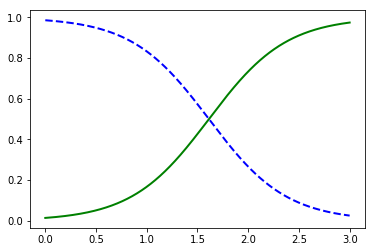

In [13]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #going form 0 to 3, 1000 values
                                            # the -1 allows it to do whatever to the row shape, as long as it has 1 column
y_proba = log_reg.predict_proba(X_new) #when you run your model, use those paremeters and for that width, predict
                                    # if it's virginica or not
                                    # returns the probability (zero class) and its completment (in two columns)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

In [ ]:
list(zip(log_reg.predict(X_new),y_proba))

### now covering part (c), but **ALL** parameters and doing a train_test_split

In [15]:
# modifying the above X, y, checking shape

X, y = iris.data, iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [17]:
# train test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state=42)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [18]:
"""
creating classifiers

A) Setosa = 1 not Setosa =0
B) Versicolour = 1, not Versicolour = 0
C) Virginica = 1, not Viginica = 0"""

y_train_setosa = (y_train == 0)
y_test_setosa = (y_test == 0)

y_train_versicolour = (y_train == 1)
y_test_versicolour = (y_test == 1)

y_train_virginica = (y_train == 2)
y_test_virginica = (y_test == 2)

### Predicting setosa 

In [26]:
log_reg = LogisticRegression(random_state=42) #init and return a log_reg object
log_reg.fit(X_train, y_train_setosa) #calls fit, "here's my x, here's my y, do the thing"

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_predict_setosa = log_reg.predict(X_test)
y_proba_setosa = log_reg.predict_proba(X_test)

### Predicting versicolour 

In [28]:
log_reg = LogisticRegression(random_state=42) #init and return a log_reg object
log_reg.fit(X_train, y_train_versicolour)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_predict_versicolour = log_reg.predict(X_test)
y_proba_versicolour = log_reg.predict_proba(X_test)

### Predicting virginica 

In [30]:
log_reg = LogisticRegression(random_state=42) #init and return a log_reg object
log_reg.fit(X_train, y_train_virginica)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_predict_virginica = log_reg.predict(X_test)
y_proba_virginica = log_reg.predict_proba(X_test)

### Graphing 

In [ ]:
#will have to figure this out later